<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Semanal Nº6
#### Nicolás Salvia


# TS6: Estimación espectral. Ventaneo de la información.

En esta tarea experimentaremos algunos conceptos presentados en el libro de Holton. DSP Principles and App.

1) Implemente las funciones para generar las siguientes ventanas w(k):
- Bartlett ó triangular
- Hann
- Blackman
- Flat-top

Ayuda: Puede consultar el capítulo 7.3 del mismo libro para obtener las expresiones analíticas de cada ventana.

a) Para cada ventana grafique w(k)
y |W(Ω)|, para N = 1000 muestras, normalizando w(k) de forma tal que la amplitud máxima de |W(Ω)|
(lóbulo principal) sea 0 dB.

Ayuda: Posiblemente convenga utilizar zero-padding para visualizar mejor |W(Ω)|.

b) Construya una tabla en la que figuren dos mediciones de la anchura del lóbulo principal de cada ventana:

- Ω0será la frecuencia del primer cruce por cero, es decir |W(Ω)| =0
- Ω1 aquella frecuencia tal que |W(Ω1)|=2√2∨−3 dB y 
- el valor de transferencia máxima de los lóbulos secundarios (expresado en dB)
$$
    W2=max{|W(Ω)|},  ∀ Ω≥Ω0
$$

Sugerencia: Normalice Ω0,1 por $$Δf= \frac {\sqrt{f_s}} {N} $$ para facilitar la comparación.

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows as win
from scipy.fft import fftshift
import pandas as pd

plt.rcParams['figure.figsize'] = [20, 10]

In [30]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [31]:
N = 1000
N_9 = 10 * N
fs = 1000
ts = 1/fs

# Inicializo la grilla de samples
samples = np.linspace(0, (N-1), N)

# Inicializo la grilla para las ventanas
dw = (2 * np.pi)/N
ww = np.linspace(0, (N-1), N) * dw 

#Inicializo la grilla frecuencia
df = fs/N_9
ff = np.linspace(0, (N_9-1), N_9) * df

In [32]:
# Inicializo las ventanas
window_rec = win.boxcar(N)
window_barlett = win.bartlett(N)
window_hann = win.hann(N)
window_blackman = win.blackman(N)
window_flat = win.flattop(N)

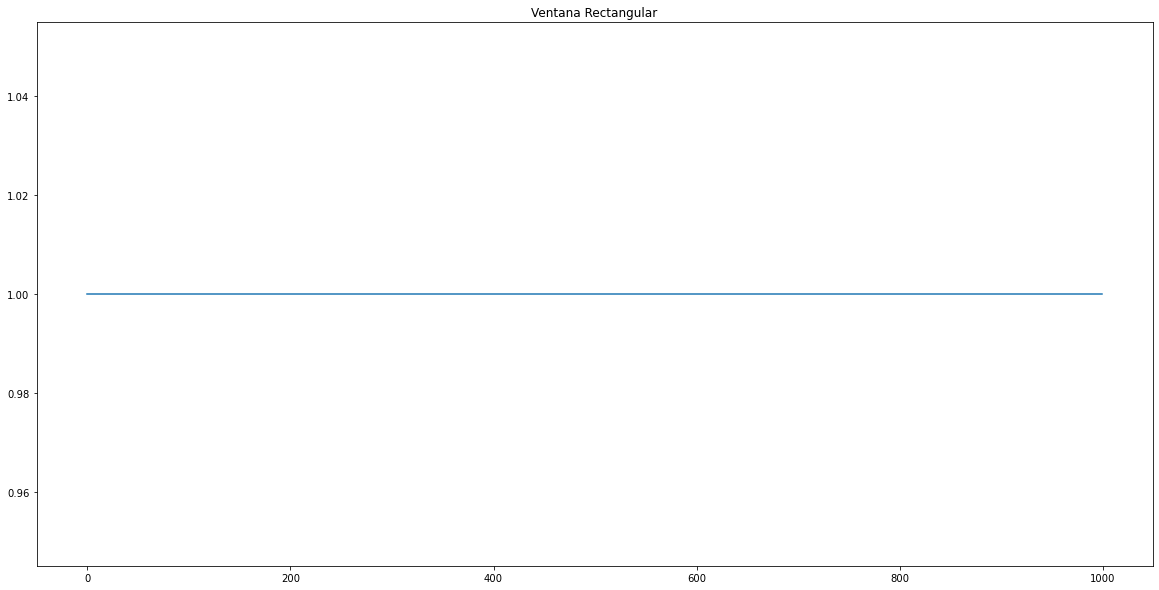

In [33]:
# Grafico las ventanas
plt.title("Ventana Rectangular")
plt.plot(samples, window_rec, label="Rectangular")

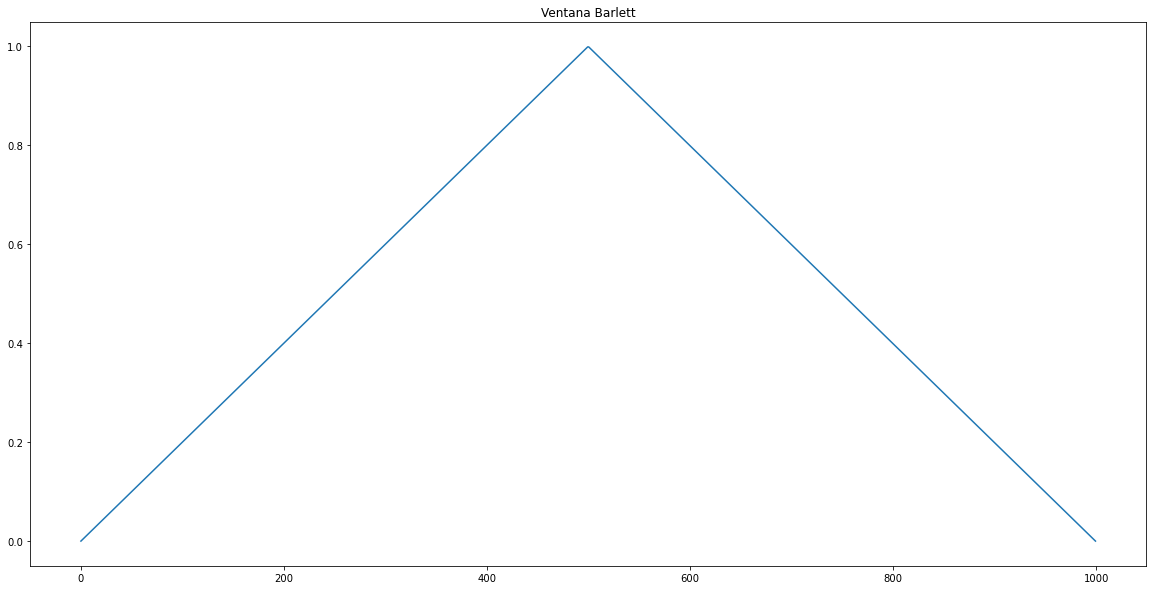

In [34]:
plt.title("Ventana Barlett")
plt.plot(samples, window_barlett, label="Barlett")

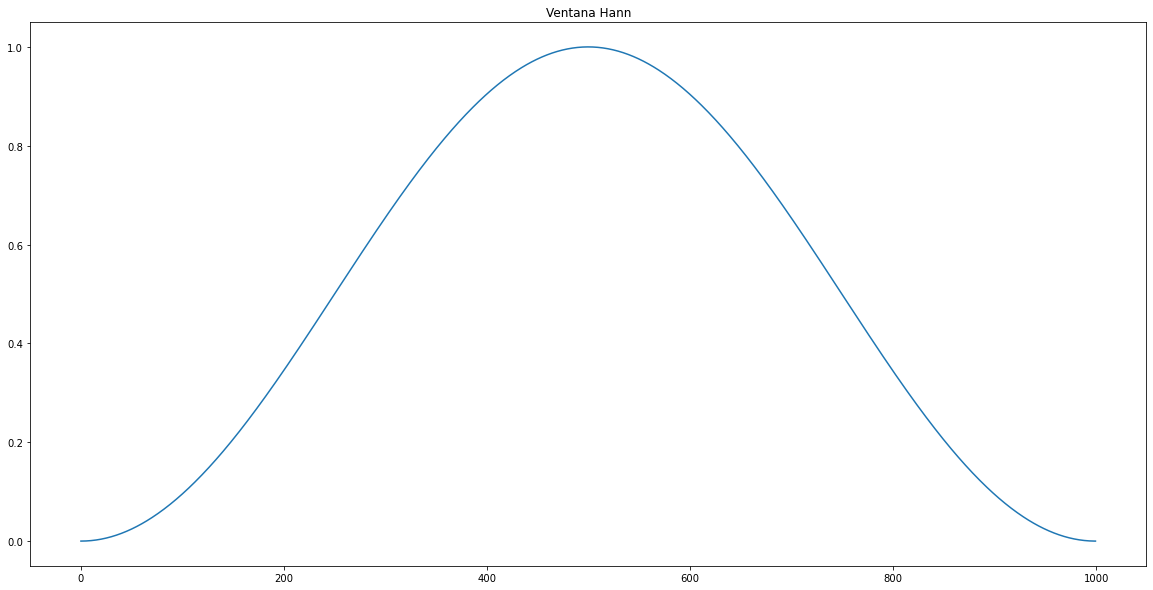

In [35]:
plt.title("Ventana Hann")
plt.plot(samples, window_hann, label="Hann")

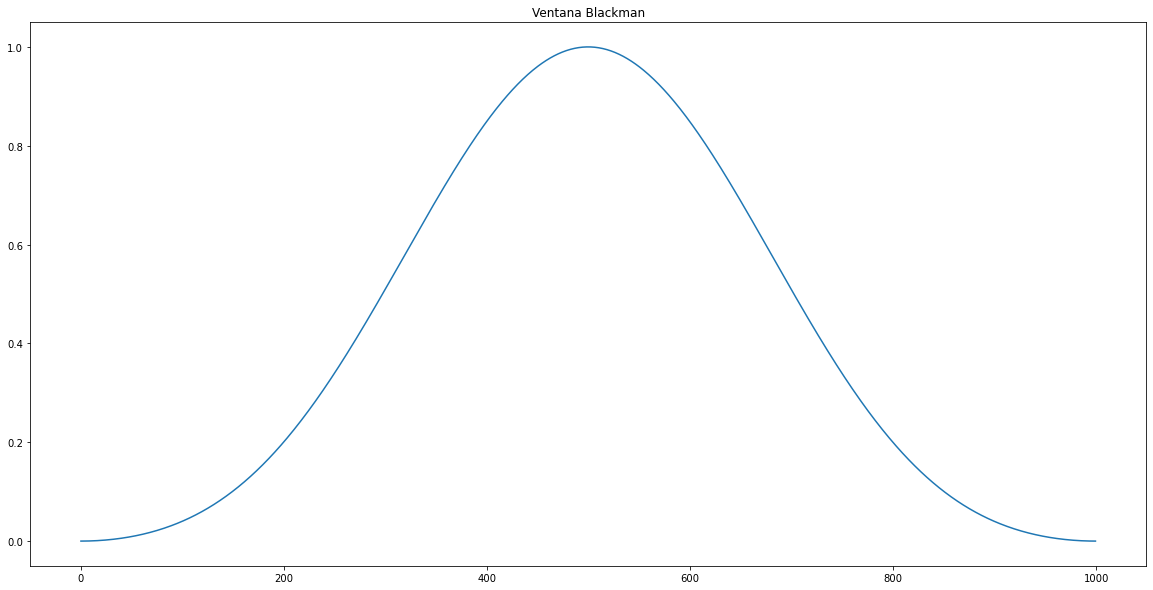

In [36]:
plt.title("Ventana Blackman")
plt.plot(samples, window_blackman, label="Blackman")

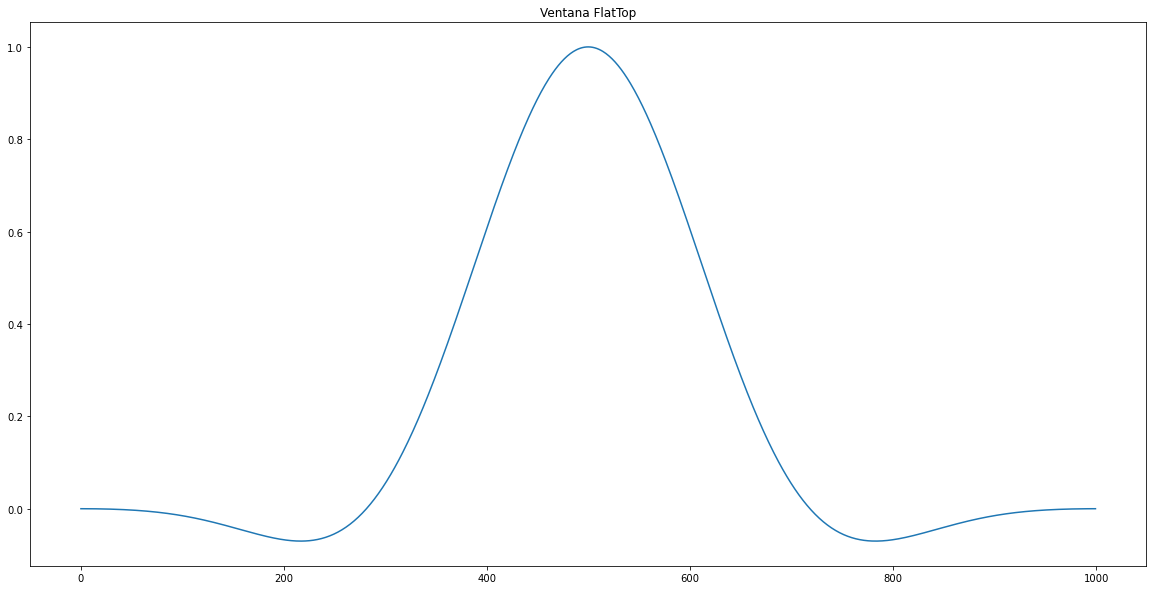

In [37]:
plt.title("Ventana FlatTop")
plt.plot(samples, window_flat, label="FlatTop")

In [38]:
# Calculo las transformadas
dft_window_rec = np.fft.fft(window_rec, axis=0, n = N_9)
dft_window_barlett = np.fft.fft(window_barlett, axis=0, n = N_9)
dft_window_hann = np.fft.fft(window_hann, axis=0, n = N_9)
dft_window_blackman = np.fft.fft(window_blackman, axis=0, n = N_9)
dft_window_flat = np.fft.fft(window_flat, axis=0, n = N_9)

In [39]:
# Calculo las amplitudes
dft_window_rec_mag =  np.abs(dft_window_rec)
dft_window_barlett_mag = np.abs(dft_window_barlett)
dft_window_hann_mag = np.abs(dft_window_hann)
dft_window_blackman_mag = np.abs(dft_window_blackman)
dft_window_flat_mag = np.abs(dft_window_flat)

<ipython-input-71-5eebce23774f>:2: RuntimeWarning: divide by zero encountered in log10
  rec_mag_log = 20*np.log10(dft_window_rec_mag/max(dft_window_rec_mag))


(-200.0, 0.0)

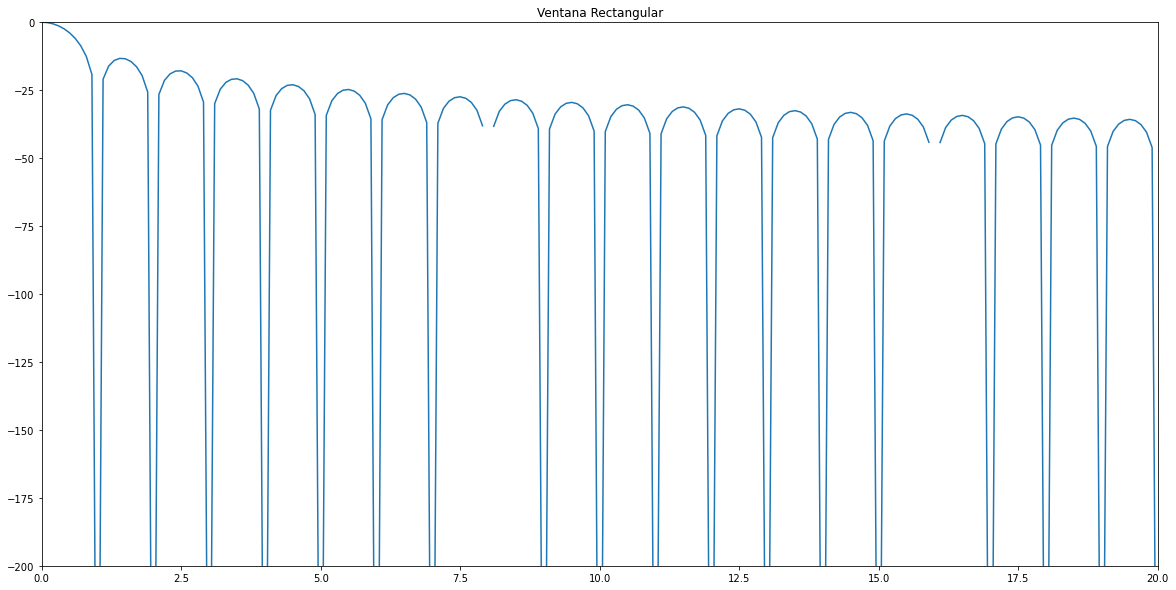

In [71]:
plt.title("Ventana Rectangular")
rec_mag_log = 20*np.log10(dft_window_rec_mag/max(dft_window_rec_mag))
plt.plot(ff, rec_mag_log, label="Rectangular")
plt.xlim([0,20])
plt.ylim([-100, 0])

<ipython-input-41-86cebad0e22b>:2: RuntimeWarning: divide by zero encountered in log10
  barlett_mag_log = 20*np.log10(dft_window_barlett_mag/max(dft_window_barlett_mag))


(-100.0, 0.0)

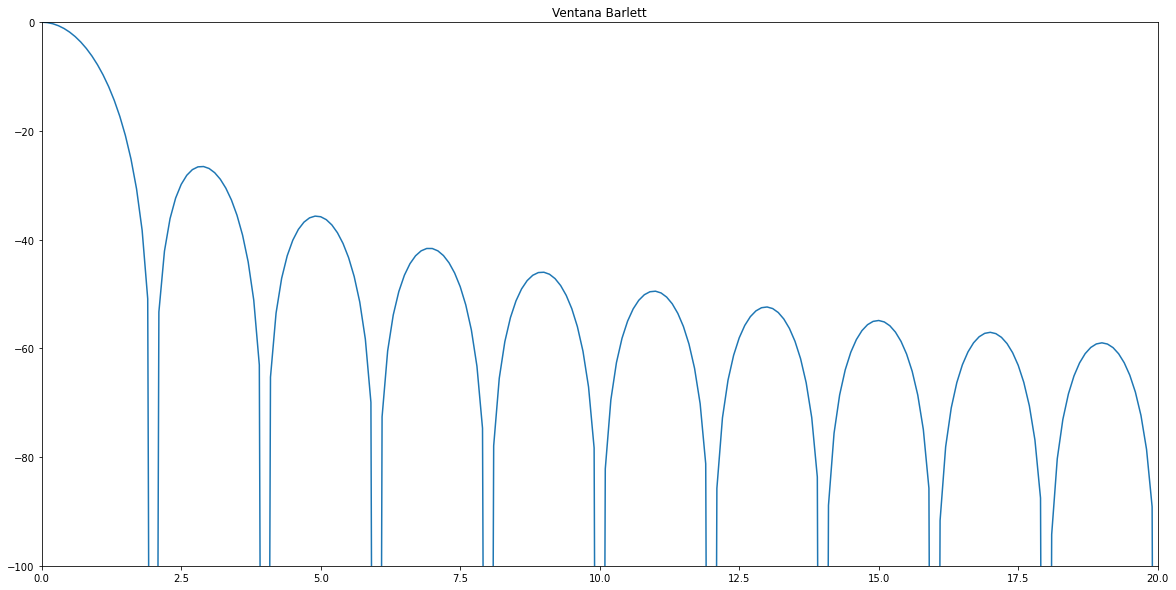

In [41]:
plt.title("Ventana Barlett")
barlett_mag_log = 20*np.log10(dft_window_barlett_mag/max(dft_window_barlett_mag))
plt.plot(ff, barlett_mag_log, label="Barlett")
plt.xlim([0,20])
plt.ylim([-100, 0])

(-100.0, 0.0)

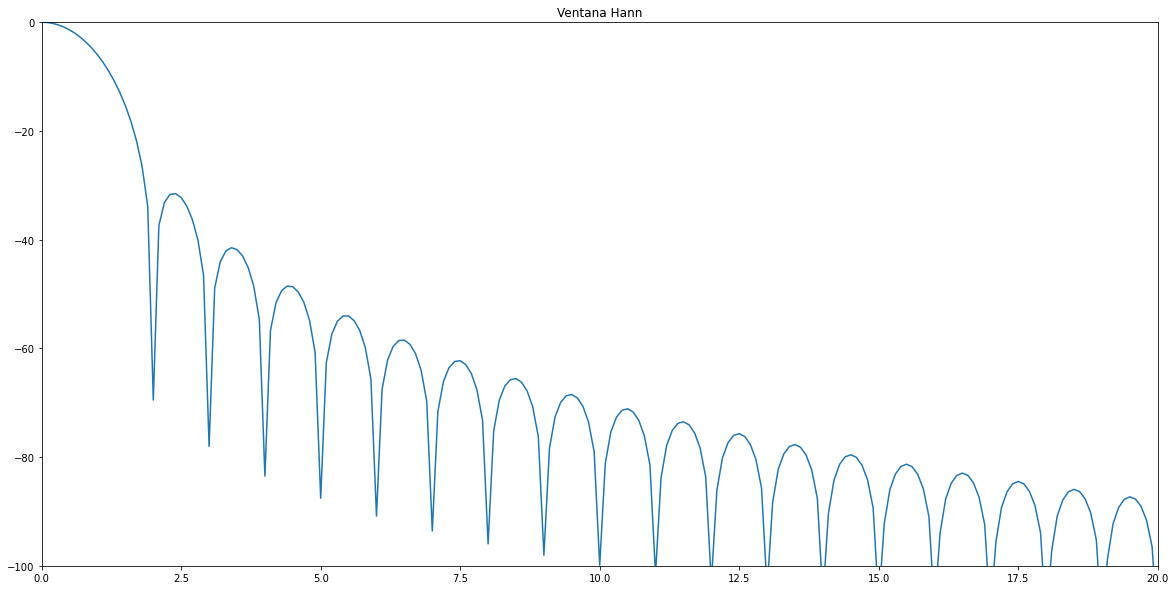

In [42]:
plt.title("Ventana Hann")
hann_mag_log = 20*np.log10(dft_window_hann_mag/max(dft_window_hann_mag))
plt.plot(ff, hann_mag_log, label="Hann")
plt.xlim([0,20])
plt.ylim([-100, 0])

(-140.0, 0.0)

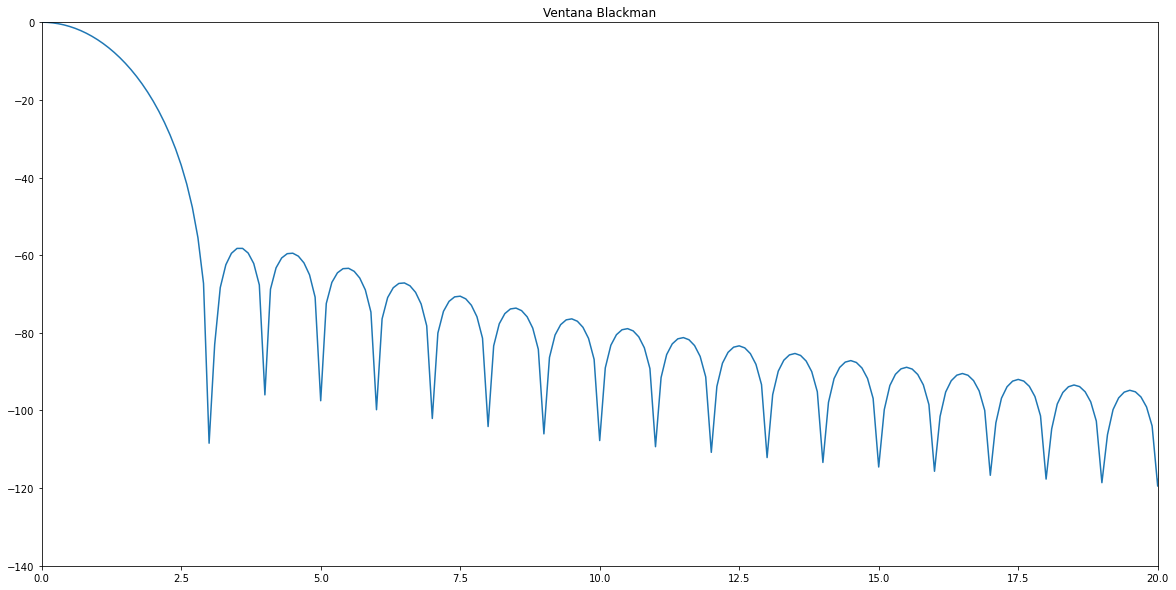

In [70]:
plt.title("Ventana Blackman")
blackman_mag_log = 20*np.log10(dft_window_blackman_mag/max(dft_window_blackman_mag))
plt.plot(ff, blackman_mag_log, label="Blackman")
plt.xlim([0, 20])
plt.ylim([-140, 0])

(-200.0, 0.0)

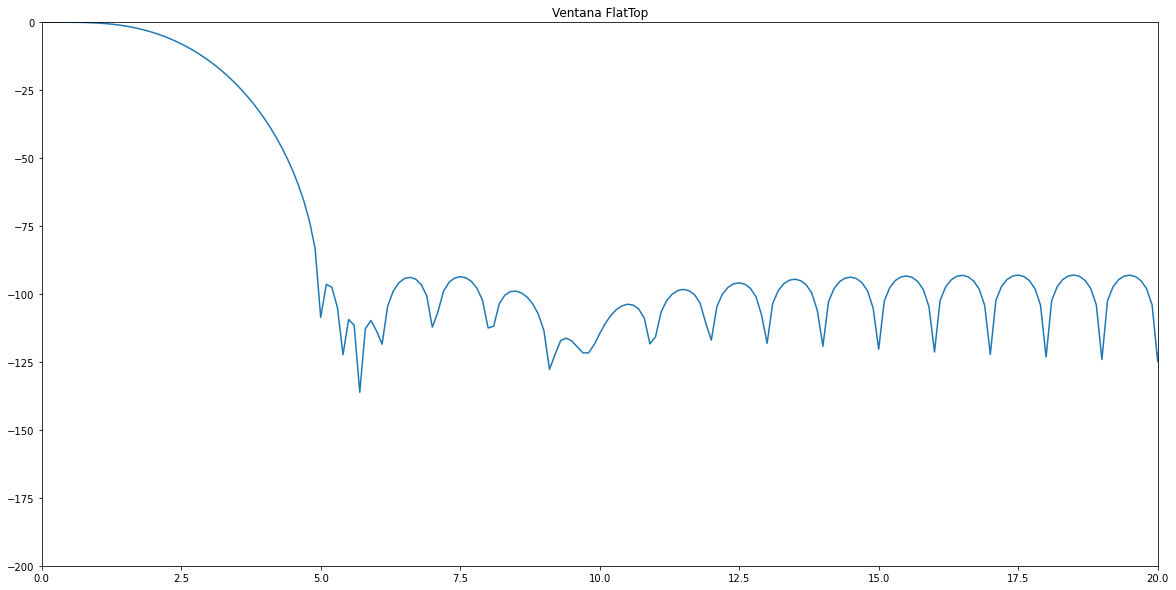

In [133]:
plt.title("Ventana FlatTop")
flat_mag_log = 20*np.log10(dft_window_flat_mag/max(dft_window_flat_mag))
plt.plot(ff, flat_mag_log, label="FlatTop")
plt.xlim([0, 20])
plt.ylim([-200, 0])

In [137]:
#Rectangular
zero_cross_rec = 0
index_zero_cross_rec = 0
for x in range (0, 20):
    if rec_mag_log[x] < zero_cross_rec:
        zero_cross_rec = rec_mag_log[x]
        index_zero_cross_rec = x
        
max_transfer_rec = -999        
for x in range (200, 500):
    if rec_mag_log[x] > max_transfer_rec:
        max_transfer_rec = rec_mag_log[x]
        
frec_zero_rec = index_zero_cross_rec * fs/N_9
frec_3db_rec = np.where(rec_mag_log == find_nearest(rec_mag_log, -3))[0][0] * fs/N_9 

#Barlett
zero_cross_barlett = 0
index_zero_cross_barlett = 0
for x in range (0, 25):
    if barlett_mag_log[x] < zero_cross_barlett:
        zero_cross_barlett = barlett_mag_log[x]
        index_zero_cross_barlett = x

max_transfer_barlett = -999        
for x in range (200, 500):
    if barlett_mag_log[x] > max_transfer_barlett:
        max_transfer_barlett = barlett_mag_log[x]        
        
frec_zero_barlett = index_zero_cross_barlett* fs/N_9
frec_3db_barlett = np.where(barlett_mag_log == find_nearest(barlett_mag_log, -3))[0][0] * fs/N_9 
        
#Hann
zero_cross_hann = 0
index_zero_cross_hann = 0
for x in range (0, 25):
    if hann_mag_log[x] < zero_cross_hann:
        zero_cross_hann = hann_mag_log[x]
        index_zero_cross_hann = x

max_transfer_hann = -999        
for x in range (200, 500):
    if hann_mag_log[x] > max_transfer_hann:
        max_transfer_hann = hann_mag_log[x]
        
frec_zero_hann = index_zero_cross_hann * fs/N_9
frec_3db_hann = np.where(hann_mag_log == find_nearest(hann_mag_log, -3))[0][0] * fs/N_9 

#Blackman
zero_cross_blackman = 0
index_zero_cross_blackman = 0
for x in range (0, 40):
    if blackman_mag_log[x] < zero_cross_blackman:
        zero_cross_blackman = blackman_mag_log[x]
        index_zero_cross_blackman = x

max_transfer_blackman = -999        
for x in range (200, 500):
    if blackman_mag_log[x] > max_transfer_blackman:
        max_transfer_blackman = blackman_mag_log[x]
        
frec_zero_blackman = index_zero_cross_blackman * fs/N_9
frec_3db_blackman = np.where(blackman_mag_log == find_nearest(blackman_mag_log, -3))[0][0] * fs/N_9 

#Flat-top
zero_cross_flat = 0
index_zero_cross_flat = 0

for x in range (0, 200):
    if flat_mag_log[x] < zero_cross_flat:
        zero_cross_flat = flat_mag_log[x]
        index_zero_cross_flat = x
        
max_transfer_flat = -999        
for x in range (200, 500):
    if flat_mag_log[x] > max_transfer_flat:
        max_transfer_flat = flat_mag_log[x]
        
frec_zero_flat = index_zero_cross_flat * fs/N_9
frec_3db_flat = np.where(flat_mag_log == find_nearest(flat_mag_log, -3))[0][0] * fs/N_9

In [141]:
# Creamos la tabla
data = [['Rectangular', frec_zero_rec, frec_3db_rec, max_transfer_rec], 
        ['Barlett', frec_zero_barlett, frec_3db_barlett, max_transfer_barlett], 
        ['Hann', frec_zero_hann, frec_3db_hann, max_transfer_hann], 
        ['Blackman', frec_zero_blackman, frec_3db_blackman, max_transfer_blackman], 
        ['Flat-top', frec_zero_flat, frec_3db_flat, max_transfer_flat]]
df = pd.DataFrame(data, columns = ['Ventana', '1° Cruce', 'Fc', 'Máxima Transferencia(db)'])
df

,Ventana,1° Cruce,Fc,Máxima Transferencia(db)
0,Rectangular,1.0,0.4,-36.172069
1,Barlett,2.0,0.6,-60.722490
2,Hann,2.0,0.7,-88.619460
3,Blackman,3.0,0.8,-96.091233
4,Flat-top,5.7,1.9,-93.162399
